# Image Segmentation - Nurlan Imanov

In [174]:
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import cv2 

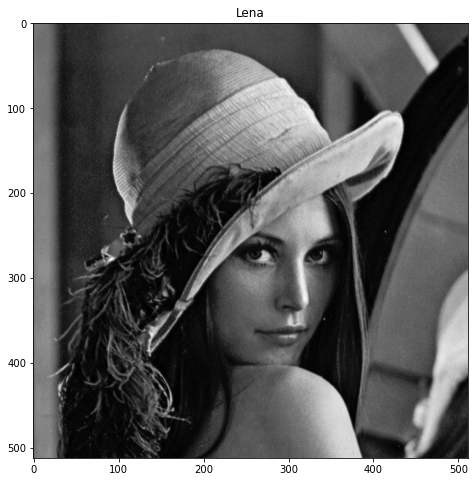

In [175]:
lena_img = cv2.imread('lena_gray.tif',0)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(lena_img,'gray')
plt.title('Lena')
plt.show()

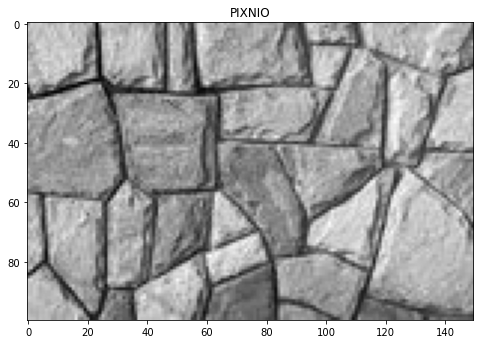

In [176]:
pixnio_img = cv2.imread('PIXNIO.jpg',0)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(pixnio_img,'gray')
plt.title('PIXNIO')
plt.show()

In [177]:
'''
With this function I give 255(max_gray_level) to given image pixel if this pixel greater than given 'threshold'
value otherwise I give 0 to the image pixel
'''
def thresholded_img(img , threshold, max_gray_level = 255):
    
    mask = img>threshold # Mask that contains with indexses which are contains pixels which are greater than threshold
    new_img = np.zeros(shape=img.shape) # Creating zero matrix with image size
    new_img[mask] = max_gray_level # Making 255 the pixels which is greater than threshold
    
    return new_img # I return new thresholded image 


# Basic Thresholding Approach

In [178]:
def basic_thresholding(img, iteration = 100):
    threshold = np.mean(img) # Best starting value of threshold is mean of the image(as we stated in lecture)
    
    for i in range(iteration): 
        mean_g1 = np.mean(img[img>threshold]) # Finding the mean of goup1
        mean_g2 = np.mean(img[img<threshold]) # Finding the mean of goup2
        threshold = (mean_g1 + mean_g2)/2   
        
    return threshold

# Checking in Lena image

In [179]:
# Getting the threshold value from basic_thresholding() function:
basic_thr_lena = basic_thresholding(lena_img) 
# And then geting thresholded version of the image regarding to basic threshold value
after_tresholding_lena = thresholded_img(lena_img,basic_thr_lena)

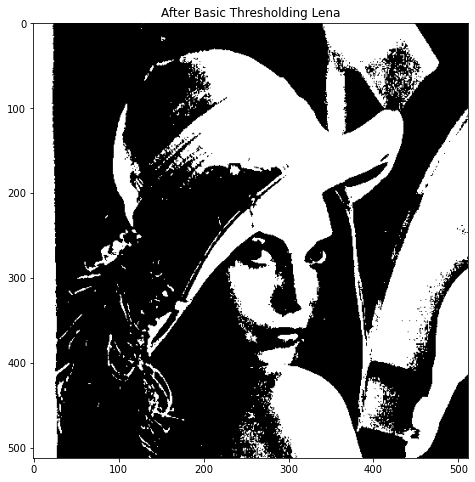

In [180]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(after_tresholding_lena ,'gray')
plt.title('After Basic Thresholding Lena')
plt.show()

# Checking Lena image in iteration N and N-1

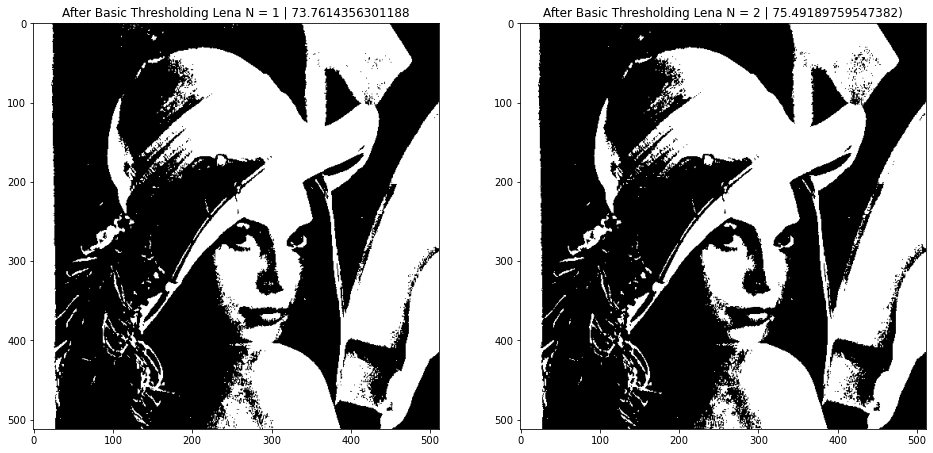

In [181]:
# For that case I take N = 2
N=2
plt.subplots(1,2,figsize=(16,16))

plt.subplot(1,2,1)
plt.imshow(thresholded_img(lena_img,basic_thresholding(lena_img,iteration=N-1)),'gray')
plt.title('After Basic Thresholding Lena N = 1 | 73.7614356301188')

plt.subplot(1,2,2)
plt.imshow(thresholded_img(lena_img,basic_thresholding(lena_img,iteration=N)),'gray')
plt.title('After Basic Thresholding Lena N = 2 | 75.49189759547382)')

plt.show()


In [182]:
basic_thresholding(lena_img,iteration=N-1),basic_thresholding(lena_img,iteration=N)

(73.7614356301188, 75.49189759547382)

### Actually we could not see real difference because : For N = 1 threshold value is  73.7614356301188 ,For N = 2 threshold value is  75.49189759547382

# Conclude about number of iteration:
##### Actually I started my threshold value from mean of the pixels in image, that is why my threshold value converged before 100 iteration. If your initial threshold value is good enough you don't need so many iteration to converge

In [183]:
# Propose a threshold which will take the algorithm to convergence
basic_thr_lena = basic_thresholding(lena_img)
print(basic_thr_lena)

79.7436494956989


### Answer is :  79.7436494956989

# Checking in PIXNIO image

In [184]:
# Same steps for PIXNIO image
basic_thr_pixnio = basic_thresholding(pixnio_img)
after_tresholding_pixnio = thresholded_img(pixnio_img,basic_thr_pixnio)

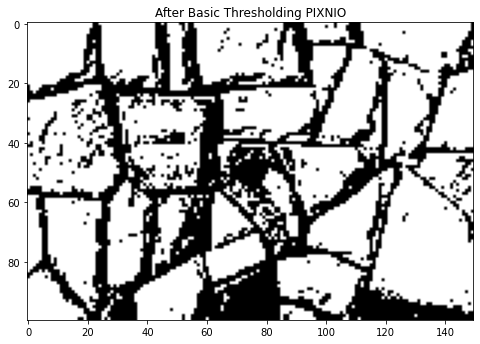

In [185]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(after_tresholding_pixnio ,'gray')
plt.title('After Basic Thresholding PIXNIO')
plt.show()

# Otsu's Method Approach

In [186]:
# With this function a get a 'dictionary' which contains probability of each gray level of image
def probabilty_of_each_value(img):
    probabilty_dict = {}
    size_img = img.shape[0] * img.shape[1] # Size of image 
    for unique_value in np.unique(img): # Each used gray level
        # np.count_nonzero() function gives number of occurence of the given value in the array
        # I used this function for finding probability
        probabilty_dict[int(unique_value)] = (np.count_nonzero(img == unique_value))/size_img
    
    return probabilty_dict

In [187]:
def otsu_method(img,max_gray_level = 255):
    
    probabilty_dict = probabilty_of_each_value(img) # Getting probability dictionary from pre-defined function
    intra_variance_list = [] # Will be used for finding minimum value of "Intra class variance"
    intra_variance_threshold_dict = {} # This dictionary will be used for storing "Intra class varinace" of each gray level in [0,255] range
    
    for threshold in range(max_gray_level): # Iterating threshold value in [0,255] range
        weight_g1 = 0 ; weight_g2 = 0
        variance_g1 = 0 ; variance_g2 = 0
        
        g1 = img[img<threshold] # Group 1
        if(g1.size != 0): # We have a chance that below threshold value no pixel is used in image.I am cheking it  
            variance_g1 = np.std(g1)# I used just 'std' instead of 'variance' thus it is not effect algorithm result
            for value in np.unique(g1):
                weight_g1 += probabilty_dict[int(value)]# sum of probabilities of each graylevel in group1
                
        g2 = img[img>threshold] # Same things for Group2
        if(g2.size != 0):
            variance_g2 = np.std(g2)
            for value in np.unique(g2):
                weight_g2 += probabilty_dict[int(value)]
                
        intra_variance = weight_g1 * variance_g1 + weight_g2 * variance_g2 # Intra class fromula
        intra_variance_threshold_dict[threshold] = intra_variance # Storing result of each checked threshold value
        
        intra_variance_list.append(intra_variance) # Adding to list each calculated "Intra class variance"
        
    
    minimum_intra_variance = min(intra_variance_list) # Finding minimum "Intra class variance"
    
    # Finding the 'threshold' value with minimum "Intra class variance"
    for threshold in intra_variance_threshold_dict.keys():
        if(minimum_intra_variance == intra_variance_threshold_dict[threshold]):
            return threshold        

# Cheking Otsu's Method in Lena image

In [188]:
otsu_thr_lena = otsu_method(lena_img)
after_tresholding_lena = thresholded_img(lena_img,otsu_thr_lena)

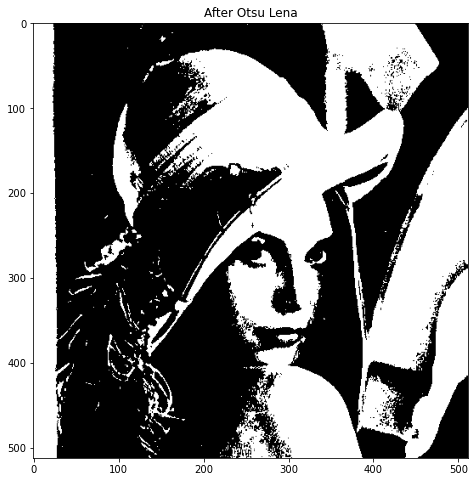

In [189]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(after_tresholding_lena ,'gray')
plt.title('After Otsu Lena')
plt.show()

# Cheking Otsu's Method in PIXNIO image

In [190]:
otsu_thr_pixnio = otsu_method(pixnio_img)
after_tresholding_pixnio = thresholded_img(pixnio_img,otsu_thr_pixnio)

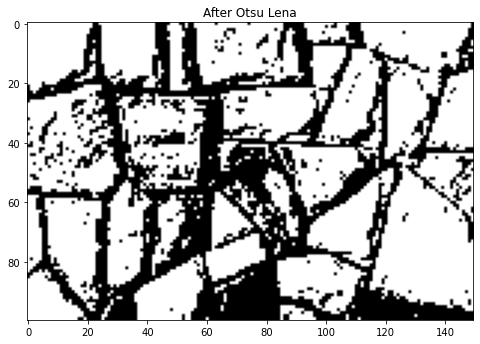

In [191]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(after_tresholding_pixnio ,'gray')
plt.title('After Otsu Lena')
plt.show()

# K-Means approach

In [192]:
lena_img = cv2.imread('lena_gray.tif',0)

In [193]:
def k_means_clustering(img,k):
    
    X = img.reshape((-1, 1)) # Creating a line array
    
    k_m = cluster.KMeans(n_clusters=k).fit(X) # Defining  k-means clustering 
  
    values = k_m.cluster_centers_.squeeze() # Getting the coordinates of the clusters centres as a 1D array
    
    labels = k_m.labels_ # Getting the label of each point
    return(values, labels)

# On Lena Image

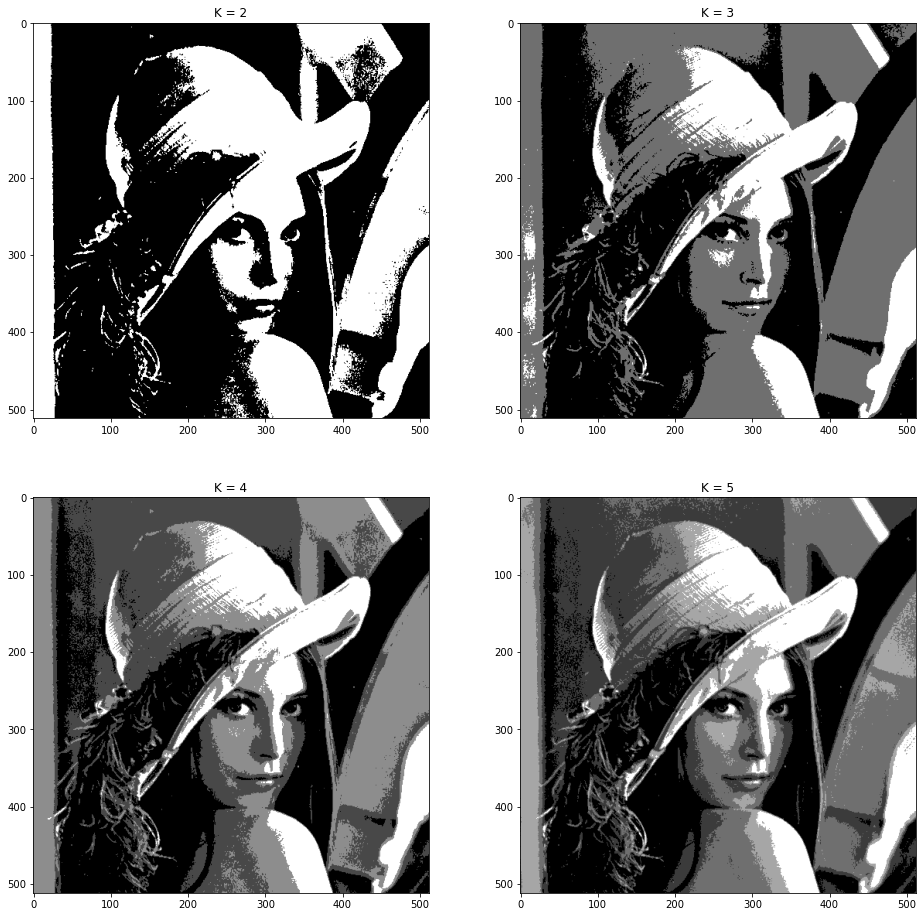

In [194]:
values, labels = k_means_clustering(lena_img, k = 2) # Group similar grey levels using k clusters
img_segm_k_2 = np.choose(labels, values)# Create the segmented array from labels and values
img_segm_k_2.shape = lena_img.shape # Reshape the array as the original image

values, labels = k_means_clustering(lena_img, k = 3) 
img_segm_k_3 = np.choose(labels, values)
img_segm_k_3.shape = lena_img.shape

values, labels = k_means_clustering(lena_img, k = 4) 
img_segm_k_4 = np.choose(labels, values)
img_segm_k_4.shape = lena_img.shape

values, labels = k_means_clustering(lena_img, k = 5) 
img_segm_k_5 = np.choose(labels, values)
img_segm_k_5.shape = lena_img.shape

plt.subplots(2,2,figsize=(16,16))

plt.subplot(2,2,1)
plt.imshow(img_segm_k_2,'gray')
plt.title('K = 2')

plt.subplot(2,2,2)
plt.imshow(img_segm_k_3,'gray')
plt.title('K = 3')

plt.subplot(2,2,3)
plt.imshow(img_segm_k_4,'gray')
plt.title('K = 4')

plt.subplot(2,2,4)
plt.imshow(img_segm_k_5,'gray')
plt.title('K = 5')

plt.show()

# On PIXNIO image

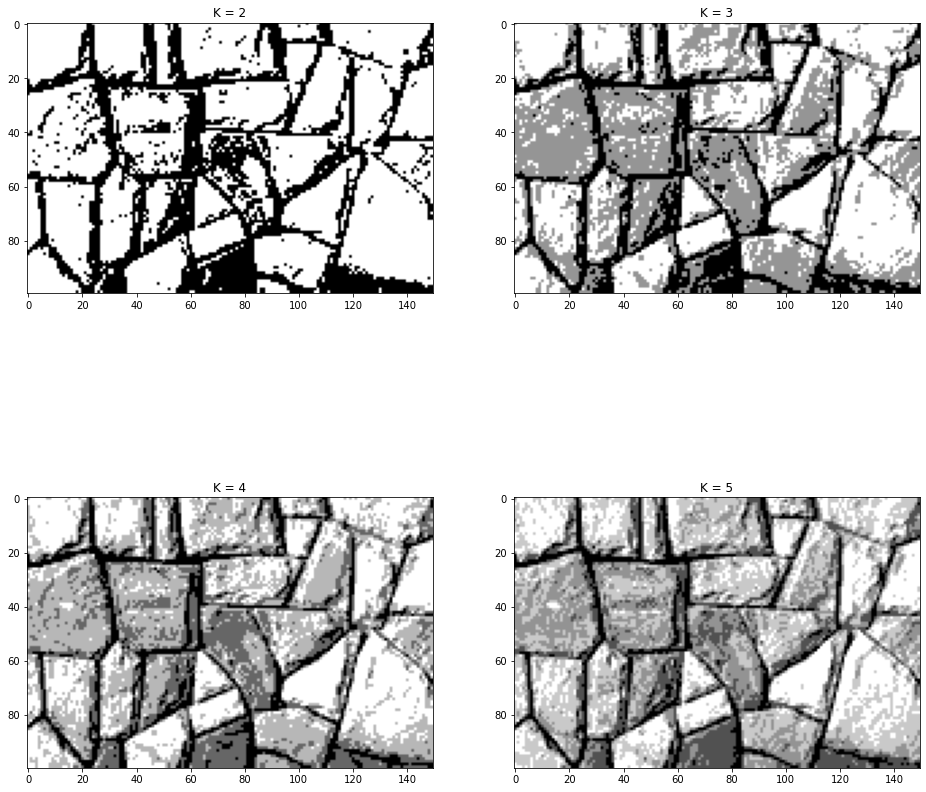

In [195]:
values, labels = k_means_clustering(pixnio_img, k = 2) # Group similar grey levels using k clusters
img_segm_k_2 = np.choose(labels, values)# Create the segmented array from labels and values
img_segm_k_2.shape = pixnio_img.shape # Reshape the array as the original image

values, labels = k_means_clustering(pixnio_img, k = 3) 
img_segm_k_3 = np.choose(labels, values)
img_segm_k_3.shape = pixnio_img.shape

values, labels = k_means_clustering(pixnio_img, k = 4) 
img_segm_k_4 = np.choose(labels, values)
img_segm_k_4.shape = pixnio_img.shape

values, labels = k_means_clustering(pixnio_img, k = 5) 
img_segm_k_5 = np.choose(labels, values)
img_segm_k_5.shape = pixnio_img.shape

plt.subplots(2,2,figsize=(16,16))

plt.subplot(2,2,1)
plt.imshow(img_segm_k_2,'gray')
plt.title('K = 2')

plt.subplot(2,2,2)
plt.imshow(img_segm_k_3,'gray')
plt.title('K = 3')

plt.subplot(2,2,3)
plt.imshow(img_segm_k_4,'gray')
plt.title('K = 4')

plt.subplot(2,2,4)
plt.imshow(img_segm_k_5,'gray')
plt.title('K = 5')

plt.show()

# 4 Application

###### Actually for these two images ,Otsu's method result  and Basic Thresholding Method  result are almost same.Therefore it is hard to tell which one is better for these two images, but I know from our lecture that in some cases when 'Basic Thresholding Method' fails to segment our image "Otsu's Method" can handle this problem. 'Basic Thresholding Method'  is good when our image's histogram can be distuingushied easily even by human eyes. So generally "Otsu's Method" is stornger than 'Basic Thresholding Method' 
###### In this practical work I saw  K-means results in differnt number of cluster that is why I find it more insteresting. But I know that we can do  multi-clustering with also "Otsu's Method" and "Basic Thresholding Method"